# Algoritmos Genéticos - Diseño de Menú para un Restaurante

Un nuevo restaurante en la zona de microcentro debe armar el menú del almuerzo y cena para los **7 días de la semana**. Cuenta con **60 platos disponibles**, cada uno con:
- Costo por porción (de 1 a 5)
- Popularidad estimada (de 5 a 10)
- Tipo de plato (italiano, carne, pescado, ensalada, etc.)

El objetivo del restaurante es seleccionar un menú semanal (14 platos, uno por día y turno) que **maximice la diferencia entre popularidad y costo**, considerando además ciertas penalizaciones por:

- Repetir un mismo plato dentro de la semana, y

- Repetir el mismo tipo de plato en comidas consecutivas (almuerzo y cena del mismo día o cena de un día y almuerzo del día siguiente).

## ¿Qué debes hacer?

1- Crear, desde cero:
- La función para **inicializar la población**.
- La función de **aptitud** (fitness).
- La función de **selección de padres** (elige un método y justifica por qué lo usaste).

2- Corregir la función de crossover y la función de mutación que se presentan con errores intencionales.

3- Integrar todas las funciones en el **loop del algoritmo genético**, ejecutarlo e imprimir:

- El **mejor fitness de un individuo en cada generación** (de forma gráfica y analítica).
- El **mejor menú** encontrado tras finalizar el loop.
- El valor **fitness** del mejor menú.

4- Realizar el punto 3 pero aplicando elitismo. Comentar qué diferencias encuentra entre los resultados obtenidos en el punto 3 y el punto 4.

5- Justificar y comentar todas tus decisiones y el código que utilices.

In [34]:
import pandas as pd
import random
import matplotlib.pyplot as plt

In [35]:
# Diccionario de 60 platos disponibles
platos = {
    'Sorrentinos de jamón y queso': {'costo': 3, 'popularidad': 9, 'tipo': 'italiano'},
    'Lasaña de carne': {'costo': 4, 'popularidad': 8, 'tipo': 'italiano'},
    'Risotto de hongos': {'costo': 5, 'popularidad': 8, 'tipo': 'italiano'},
    'Pizza fugazzeta': {'costo': 2, 'popularidad': 9, 'tipo': 'italiano'},
    'Canelones de verdura': {'costo': 3, 'popularidad': 7, 'tipo': 'italiano'},
    'Asado con papas': {'costo': 5, 'popularidad': 10, 'tipo': 'carne'},
    'Milanesa napolitana': {'costo': 4, 'popularidad': 9, 'tipo': 'carne'},
    'Albóndigas en salsa': {'costo': 3, 'popularidad': 7, 'tipo': 'carne'},
    'Estofado criollo': {'costo': 2, 'popularidad': 8, 'tipo': 'carne'},
    'Matambre a la pizza': {'costo': 4, 'popularidad': 9, 'tipo': 'carne'},
    'Filet de merluza con puré': {'costo': 3, 'popularidad': 8, 'tipo': 'pescado'},
    'Salmón con papines': {'costo': 5, 'popularidad': 10, 'tipo': 'pescado'},
    'Tarta de atún': {'costo': 2, 'popularidad': 6, 'tipo': 'pescado'},
    'Empanadas de pescado': {'costo': 2, 'popularidad': 7, 'tipo': 'pescado'},
    'Ensalada caprese': {'costo': 1, 'popularidad': 7, 'tipo': 'ensalada'},
    'Mix verde con huevo y croutons': {'costo': 2, 'popularidad': 7, 'tipo': 'ensalada'},
    'Ensalada de lentejas': {'costo': 2, 'popularidad': 6, 'tipo': 'ensalada'},
    'Ensalada tibia con pollo grillado': {'costo': 3, 'popularidad': 8, 'tipo': 'ensalada'},
    'Zapallitos rellenos': {'costo': 3, 'popularidad': 7, 'tipo': 'vegetariano'},
    'Tarta de espinaca y ricota': {'costo': 2, 'popularidad': 6, 'tipo': 'vegetariano'},
    'Milanesa de berenjena': {'costo': 3, 'popularidad': 8, 'tipo': 'vegetariano'},
    'Tortilla de papas': {'costo': 2, 'popularidad': 8, 'tipo': 'vegetariano'},
    'Chow Mein': {'costo': 2, 'popularidad': 8, 'tipo': 'oriental'},
    'Pollo agridulce con arroz': {'costo': 4, 'popularidad': 8, 'tipo': 'oriental'},
    'Wok de cerdo y verduras': {'costo': 4, 'popularidad': 7, 'tipo': 'oriental'},
    'Ramen': {'costo': 3, 'popularidad': 6, 'tipo': 'oriental'},
    'Guiso de lentejas vegano': {'costo': 2, 'popularidad': 8, 'tipo': 'vegano'},
    'Medallones de mijo y calabaza': {'costo': 3, 'popularidad': 7, 'tipo': 'vegano'},
    'Tacos veganos': {'costo': 3, 'popularidad': 8, 'tipo': 'vegano'},
    'Bowl de quinoa y vegetales': {'costo': 4, 'popularidad': 9, 'tipo': 'vegano'},
    'Locro': {'costo': 3, 'popularidad': 9, 'tipo': 'regional'},
    'Humita en chala': {'costo': 2, 'popularidad': 8, 'tipo': 'regional'},
    'Empanadas salteñas': {'costo': 2, 'popularidad': 9, 'tipo': 'carne'},
    'Tamales': {'costo': 2, 'popularidad': 7, 'tipo': 'regional'},
    'Polenta con tuco': {'costo': 2, 'popularidad': 7, 'tipo': 'italiano'},
    'Ñoquis del 29': {'costo': 3, 'popularidad': 9, 'tipo': 'italiano'},
    'Puchero': {'costo': 3, 'popularidad': 7, 'tipo': 'carne'},
    'Canelones criollos': {'costo': 4, 'popularidad': 8, 'tipo': 'italiano'},
    'Tarta de choclo': {'costo': 3, 'popularidad': 7, 'tipo': 'vegetariano'},
    'Ensalada rusa': {'costo': 2, 'popularidad': 6, 'tipo': 'ensalada'},
    'Berenjenas al escabeche': {'costo': 2, 'popularidad': 5, 'tipo': 'vegetariano'},
    'Arroz con leche': {'costo': 1, 'popularidad': 6, 'tipo': 'postre'},
    'Pastel de papa': {'costo': 3, 'popularidad': 9, 'tipo': 'carne'},
    'Tarta pascualina': {'costo': 2, 'popularidad': 7, 'tipo': 'vegetariano'},
    'Guiso carrero': {'costo': 3, 'popularidad': 8, 'tipo': 'carne'},
    'Bife a la criolla': {'costo': 4, 'popularidad': 9, 'tipo': 'carne'},
    'Fainá': {'costo': 2, 'popularidad': 6, 'tipo': 'vegetariano'},
    'Revuelto gramajo': {'costo': 3, 'popularidad': 8, 'tipo': 'carne'},
    'Milanesa a caballo': {'costo': 4, 'popularidad': 9, 'tipo': 'carne'},
    'Tortilla santiagueña': {'costo': 2, 'popularidad': 7, 'tipo': 'regional'},
    'Lengua a la vinagreta': {'costo': 2, 'popularidad': 5, 'tipo': 'carne'},
    'Matambre arrollado': {'costo': 4, 'popularidad': 8, 'tipo': 'carne'},
    'Costillitas de cerdo': {'costo': 5, 'popularidad': 9, 'tipo': 'carne'},
    'Carne al horno con papas': {'costo': 4, 'popularidad': 9, 'tipo': 'carne'},
    'Zapallo relleno': {'costo': 3, 'popularidad': 7, 'tipo': 'vegetariano'},
    'Empanadas árabes': {'costo': 3, 'popularidad': 8, 'tipo': 'carne'},
    'Garbanzos guisados': {'costo': 2, 'popularidad': 7, 'tipo': 'vegano'},
    'Tallarines con estofado': {'costo': 3, 'popularidad': 8, 'tipo': 'italiano'},
    'Sopa paraguaya': {'costo': 2, 'popularidad': 7, 'tipo': 'regional'},
    'Croquetas de arroz': {'costo': 2, 'popularidad': 6, 'tipo': 'vegetariano'}
}

## Parte 1 – Genoma y generación de población

Creá la función `generatePopulation()` para generar una lista de individuos, cada uno con 14 platos.

In [36]:
def generar_poblacion_inicial(platos_dict, tamano_poblacion=50):
    
    todos_los_platos = list(platos_dict.keys())  # Lista con todos los nombres de platos disponibles
    poblacion = []  # Lista donde se guardarán todos los menús generados

    for _ in range(tamano_poblacion):  # Repetimos según el tamaño de la población deseado
        random.shuffle(todos_los_platos)  # Mezclamos aleatoriamente los platos
        menu = todos_los_platos[:14]  # Seleccionamos los primeros 14 platos para formar un menú semanal
        poblacion.append(menu)  # Agregamos ese menú a la población

    return poblacion  # Devolvemos la población completa


## Parte 2 – Función de aptitud (fitness)

Creá la función `fitness()` y decide si buscarás maximizar o minimizar el fitness total. Para calcular este valor debes saber que:

- Fitness Total = Popularidad - Costo - Penalidades

Y las penalidades son:

- -2 si un plato se repite en la semana
- -1 si un tipo de plato se repite en comidas consecutivas

In [37]:
def fitness(menu, platos_dict):
    
    total_popularidad = 0  # Suma total de popularidades del menú
    total_costo = 0  # Suma total de costos del menú
    penalizacion_repetidos = 0  # Penalización por repetir un mismo plato en la semana
    penalizacion_tipos_consecutivos = 0  # Penalización por repetir tipo de plato entre comidas consecutivas

    for plato in menu:
        total_popularidad += platos_dict[plato]['popularidad']  # Sumo la popularidad del plato al total
        total_costo += platos_dict[plato]['costo']  # Sumo el costo del plato al total

    repeticiones = len(menu) - len(set(menu))  # Cuento cuántos platos están repetidos en el menú
    penalizacion_repetidos = repeticiones * 2  # Penalizo con -2 por cada plato repetido

    tipos = [platos_dict[plato]['tipo'] for plato in menu]  # Obtengo la secuencia de tipos de cada plato en el menú
    for i in range(len(tipos) - 1):  # Recorro pares consecutivos de comidas
        if tipos[i] == tipos[i+1]:
            penalizacion_tipos_consecutivos += 1  # Penalizo con -1 si el tipo de comida se repite seguido

    puntaje_total = total_popularidad - total_costo - penalizacion_repetidos - penalizacion_tipos_consecutivos  # Fitness final

    return puntaje_total  # Devuelvo el valor de aptitud del menú


## Parte 3 – Selección de padres

Elige un método de selección de padres, justificando por qué elegiste ese método y creá la función `selectParents()`.

In [38]:
def seleccionar_accept_reject(poblacion, funcion_fitness, platos_dict):
    
    puntajes = [funcion_fitness(menu, platos_dict) for menu in poblacion]  # Calculamos el fitness de cada menú
    minimo = min(puntajes)  # Buscamos el puntaje mínimo

    if minimo <= 0:
        puntajes = [p + abs(minimo) + 1 for p in puntajes]  # Desplazamos todos los valores para que sean positivos

    maximo = max(puntajes)  # Necesitamos el fitness máximo para definir la probabilidad de aceptación

    puntajes_dict = {tuple(menu): f for menu, f in zip(poblacion, puntajes)}  # Asignamos el fitness a cada menú

    while True:
        menu_candidato = random.choice(poblacion)  # Elegimos un menú al azar
        fitness_candidato = puntajes_dict[tuple(menu_candidato)]  # Buscamos su fitness
        if random.uniform(0, maximo) < fitness_candidato:  # Aceptamos con probabilidad proporcional
            return menu_candidato  # Devuelvo el menú aceptado


In [39]:
def seleccionar_dos_padres(poblacion, funcion_fitness, platos_dict):
    
    padre1 = seleccionar_accept_reject(poblacion, funcion_fitness, platos_dict)  # Primer padre
    padre2 = seleccionar_accept_reject(poblacion, funcion_fitness, platos_dict)  # Segundo padre
    
    return padre1, padre2  # Devuelvo los dos menús seleccionados como padres


Se eligio el metodo de aceptar-rechazar debido a que es simple de implementar y permite una selección proporcional al fitness. Esto significa que los individuos más aptos tienen más probabilidades de ser seleccionados, lo que puede acelerar la convergencia hacia soluciones óptimas. Sin embargo, también se mantiene la diversidad genética al permitir que otros individuos menos aptos tengan la oportunidad de ser seleccionados, lo que puede ayudar a evitar caer en óptimos locales.


## Parte 4 – Crossover

Este código para la función crossover está incorrecto. Explica por qué y haz los cambios que consideres necesario para corregirlo.

```python
def crossover(population, padre1, padre2):
    singlePoint = random.randint(1, len(population) - 1)
    child = parentA[:singlePoint] + parentB[:singlePoint]

    return child
```

## ❌ Errores detectados en la función original de crossover

1. Se usan variables incorrectas (`parentA`, `parentB`) en lugar de los parámetros `padre1`, `padre2`, lo que genera un `NameError`.
2. La lógica de corte está mal: se toma el mismo segmento de ambos padres, generando un hijo incompleto y redundante.
3. El hijo puede contener platos repetidos, lo que **viola la restricción del problema** (cada menú debe tener 14 platos únicos).
4. No se controla que el hijo tenga exactamente 14 platos.


In [40]:
def crossover(padre1, padre2):
    
    punto_corte = random.randint(1, 13)  # Elegimos un punto de corte entre 1 y 13 (no extremos)
    hijo = padre1[:punto_corte]  # Tomamos los primeros platos del padre1
    
    for plato in padre2:
        if plato not in hijo:  # Solo agregamos si el plato no está ya en el hijo
            hijo.append(plato)
        if len(hijo) == 14:  # Si ya tenemos 14 platos, cortamos
            break

    return hijo  # Devolvemos el nuevo menú generado


## Parte 5 – Mutación

Este código para la función mutate está incorrecto. Explica por qué y haz los cambios que consideres necesario para corregirlo.

```python
def mutate(individuo):
    for i in range(len(individuo)):
      individuo[i] = random.choice()
    return nuevo
```

## ❌ Errores detectados en la función original de mutación

1. Se usa `random.choice()` sin pasarle una lista como argumento, lo que genera un `TypeError` al momento de ejecutarse.

2. Recorre todo el individuo y reemplaza **cada plato**, lo cual no es una mutación puntual sino una regeneración completa del menú.

3. No controla que los platos nuevos sean distintos a los que ya están en el menú, por lo tanto **puede introducir platos repetidos**, lo que **viola la restricción del problema**.

4. Intenta devolver la variable `nuevo`, que **nunca fue creada**, lo que genera un `NameError`.


In [41]:
def mutar_menu(menu, platos_dict, prob_mutacion=0.1):
    
    nuevo_menu = menu.copy()  # Hacemos una copia para no modificar el menú original

    if random.random() < prob_mutacion:  # Solo mutamos si se cumple la probabilidad
        posicion = random.randint(0, len(nuevo_menu) - 1)  # Elegimos una posición aleatoria en el menú

        todos_los_platos = list(platos_dict.keys())  # Lista de platos disponibles
        platos_posibles = list(set(todos_los_platos) - set(nuevo_menu))  # Platos que no están ya en el menú

        if platos_posibles:  # Si hay platos posibles para reemplazar sin repetir
            nuevo_plato = random.choice(platos_posibles)  # Elegimos un plato nuevo
            nuevo_menu[posicion] = nuevo_plato  # Reemplazamos el plato en esa posición

    return nuevo_menu  # Devolvemos el menú (mutado o no)


## Parte 6 – Loop del AG

1. Crear el loop del algoritmo genético.
2. Definir tamaño de la población y tasa de mutación y explicar brevemente el por qué de su elección.
3. Inicializar loop.
4. Imprimir mejor menú y fitness final.
5. Visualizar la evolución del mejor fitness por generación.

In [42]:
def algoritmo_genetico(platos_dict, generaciones=100, tamano_poblacion=50, tasa_mutacion=0.1):
    
    poblacion = generar_poblacion_inicial(platos_dict, tamano_poblacion)  # Creo la población inicial de menús
    mejor_menu_ever = max(poblacion, key=lambda x: fitness(x, platos_dict))  # Guardo el mejor menú inicial
    mejor_fitness_ever = fitness(mejor_menu_ever, platos_dict)  # Guardo su fitness
    historial_fitness = []  # Guardo el mejor fitness de cada generación

    for gen in range(generaciones):
        nueva_poblacion = []

        while len(nueva_poblacion) < tamano_poblacion:
            padre1, padre2 = seleccionar_dos_padres(poblacion, fitness, platos_dict)  # Selecciono dos menús padres
            hijo = crossover(padre1, padre2)  # Aplico crossover para crear un nuevo menú
            hijo_mutado = mutar_menu(hijo, platos_dict, prob_mutacion=tasa_mutacion)  # Aplico mutación con baja probabilidad
            nueva_poblacion.append(hijo_mutado)

        poblacion = nueva_poblacion  # Reemplazo la población con la nueva generación
        mejor_menu_gen = max(poblacion, key=lambda x: fitness(x, platos_dict))  # Mejor menú de esta generación
        fitness_gen = fitness(mejor_menu_gen, platos_dict)  # Su fitness
        historial_fitness.append(fitness_gen)

        print(f"Generación {gen+1}: Mejor fitness = {fitness_gen}")

        if fitness_gen > mejor_fitness_ever:  # Si encontramos uno mejor, lo actualizamos
            mejor_menu_ever = mejor_menu_gen
            mejor_fitness_ever = fitness_gen

    return mejor_menu_ever, mejor_fitness_ever, historial_fitness


Generación 1: Mejor fitness = 73
Generación 2: Mejor fitness = 73
Generación 3: Mejor fitness = 73
Generación 4: Mejor fitness = 73
Generación 5: Mejor fitness = 75
Generación 6: Mejor fitness = 76
Generación 7: Mejor fitness = 72
Generación 8: Mejor fitness = 73
Generación 9: Mejor fitness = 74
Generación 10: Mejor fitness = 74
Generación 11: Mejor fitness = 73
Generación 12: Mejor fitness = 72
Generación 13: Mejor fitness = 70
Generación 14: Mejor fitness = 69
Generación 15: Mejor fitness = 70
Generación 16: Mejor fitness = 70
Generación 17: Mejor fitness = 70
Generación 18: Mejor fitness = 69
Generación 19: Mejor fitness = 70
Generación 20: Mejor fitness = 70
Generación 21: Mejor fitness = 68
Generación 22: Mejor fitness = 70
Generación 23: Mejor fitness = 68
Generación 24: Mejor fitness = 68
Generación 25: Mejor fitness = 69
Generación 26: Mejor fitness = 70
Generación 27: Mejor fitness = 71
Generación 28: Mejor fitness = 69
Generación 29: Mejor fitness = 72
Generación 30: Mejor fi

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_12793/4049670110.py:19: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


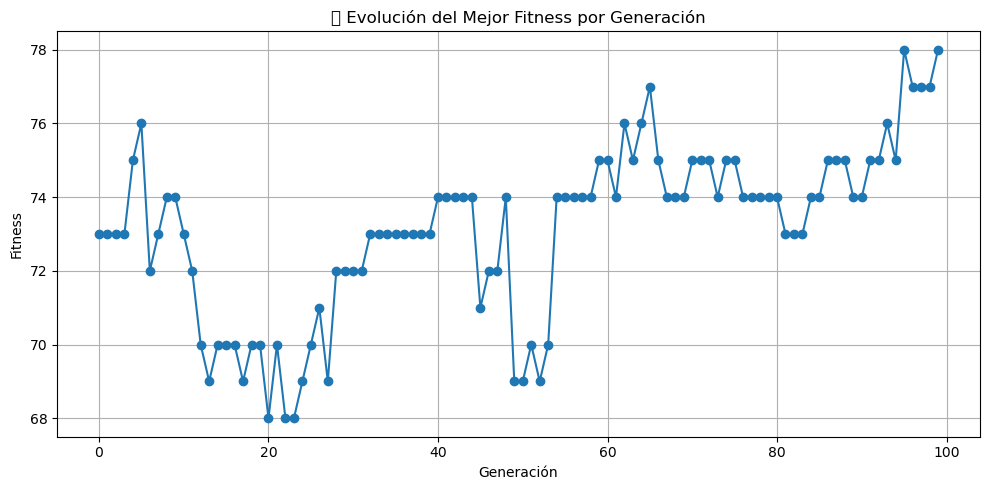

In [43]:
# Ejecutamos el algoritmo
mejor_menu, mejor_score, evolucion_fitness = algoritmo_genetico(platos, generaciones=100, tamano_poblacion=50, tasa_mutacion=0.1)

# Mostramos el menú final
print("\n📋 Mejor menú encontrado:")
for i, plato in enumerate(mejor_menu):
    turno = "Almuerzo" if i % 2 == 0 else "Cena"
    print(f"Día {i // 2 + 1} ({turno}): {plato}")

print(f"\n⭐ Fitness total del mejor menú: {mejor_score}")

# Graficamos la evolución del fitness
plt.figure(figsize=(10, 5))
plt.plot(evolucion_fitness, marker='o')
plt.title("📈 Evolución del Mejor Fitness por Generación")
plt.xlabel("Generación")
plt.ylabel("Fitness")
plt.grid(True)
plt.tight_layout()
plt.show()


## ⚙️ Parámetros del algoritmo genético

- **Tamaño de la población: 50**
  Se eligió un valor moderado para mantener diversidad genética sin que el algoritmo sea muy costoso en términos de tiempo.

- **Cantidad de generaciones: 100**
  Permite al algoritmo converger y mejorar progresivamente el menú, sin hacerlo excesivamente largo.

- **Tasa de mutación: 0.1 (10%)**
  Se introduce variabilidad suficiente para evitar estancamiento en óptimos locales, pero sin alterar en exceso menús que ya funcionan bien.

---

El algoritmo evoluciona generación tras generación hasta encontrar un menú que maximiza la popularidad total, reduce el costo, y evita repeticiones tanto de platos como de tipos consecutivos. El gráfico final muestra cómo mejora el fitness a lo largo del tiempo.
